# BANK REVIEW COMPLAINT ANALYSIS - Text Mining(by Kmeans Clustering)

<b>Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load Dataset

In [2]:
# read excel into a DataFrame
data = pd.read_excel('BankReviews.xlsx')

In [3]:
data= data[['Reviews', 'Stars']]
data.head()

,Reviews,Stars
0,"Great job, Wyndham Capital! Each person was pr...",5
1,Matthew Richardson is professional and helpful...,5
2,We had a past experience with Wyndham Mortgage...,5
3,We have been dealing with Brad Thomka from the...,5
4,I can't express how grateful I am for the supp...,5


<b>Basic Exploratory Analysis

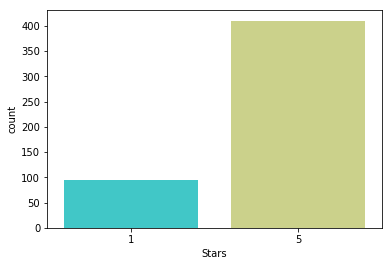

In [4]:
import seaborn as sns

sns.countplot(x='Stars',data=data,palette='rainbow')

<b>Bank data - Word cloud with all words

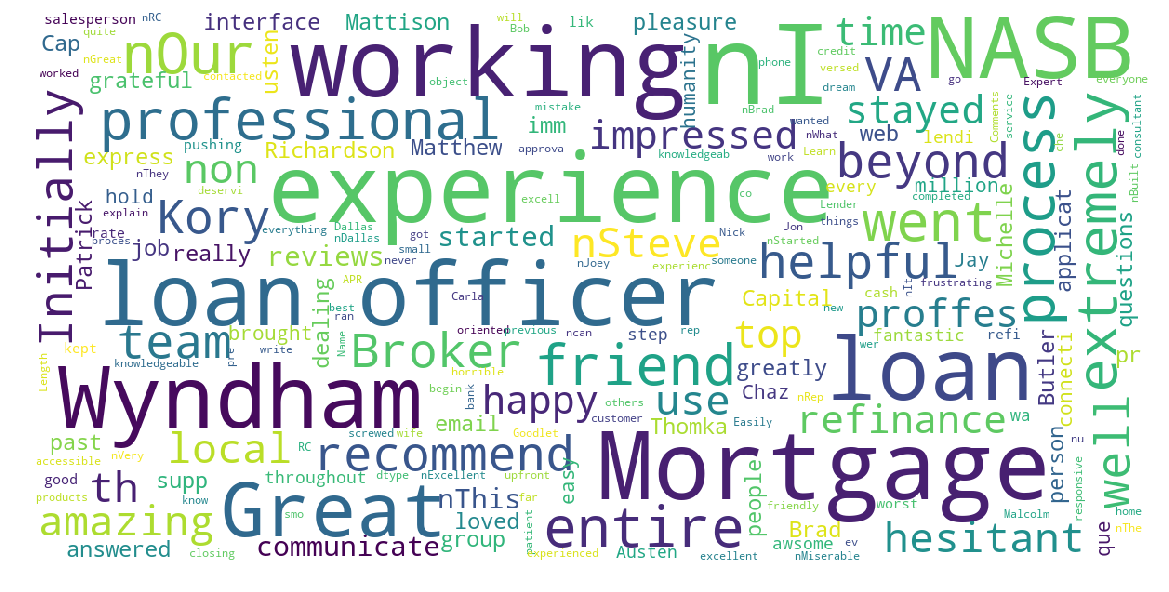

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Reviews"])

In [6]:
#Generating New Festures
eng_stopword= set(stopwords.words('english'))
data['Reviews'] = data['Reviews'].astype(str)
data['count_sent'] = data['Reviews'].apply(lambda x: len(re.findall("\n",str(x)))+1)
#word count
data['count_word'] = data.Reviews.apply(lambda x : len(str(x).split()))
#Unique word count
data['count_unique_word'] = data.Reviews.apply(lambda x: len(set(str(x).split())))
#Letter count
data['count_letters'] = data.Reviews.apply(lambda x:len(str(x)))
#word density
data['word_density'] = data.count_letters / data.count_word+1
#punctuation count
data['count_punctuation'] = data.Reviews.apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case word count
data['count_word_upper'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#lower case word count
data['count_word_lower'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.islower()]))
# title case words count
data['count_word_title'] = data.Reviews.apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#number of stop words
data['count_stopwords'] = data.Reviews.apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopword]))
#Average length of words
data['mean_word_len'] =  data.Reviews.apply(lambda x: np.mean([len(w) for w in str(x).split()]))
#number of numeric
data['numeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isdigit()]))
#number of alphanumeric
data['alphanumeric'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalnum()]))
#number of alphabetic
data['alphabetic'] = data.Reviews.apply(lambda x: len([x for x in x.split() if x.isalpha()]))
#count the occurence of all words
data['wordcounts'] = data.Reviews.apply(lambda x: dict([[t,x.split().count(t)] for t in set(x.split())]))
data.head(1)

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuation,count_word_upper,count_word_lower,count_word_title,count_stopwords,mean_word_len,numeric,alphanumeric,alphabetic,wordcounts
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,7.631579,4,0,14,5,5,5.684211,0,15,15,"{'was': 1, 'Great': 1, 'job,': 1, 'Capital!': ..."


In [7]:
pos_family = {'noun' : ['NN','NNS','NNP','NNPS'],'pron':['PRP','PRP$','WP','WP$'],'verb':['VB','VBD','VBG','VBN','VBP','VBZ'],'adj':['JJ','JJR','JJS'],'adv':['RB','RBR','RBS','WRB']}
#function to chek and get the pert of speech tag count of a words in a given sentence
def check_pos_tag(x,flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt+=1
    except:
        pass
    return cnt

data['noun_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'noun'))
data['pron_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'pron'))
data['verb_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'verb'))
data['adj_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adj'))
data['adv_count'] = data.Reviews.apply(lambda x: check_pos_tag(x,'adv'))
data.head(1)

,Reviews,Stars,count_sent,count_word,count_unique_word,count_letters,word_density,count_punctuation,count_word_upper,count_word_lower,...,mean_word_len,numeric,alphanumeric,alphabetic,wordcounts,noun_count,pron_count,verb_count,adj_count,adv_count
0,"Great job, Wyndham Capital! Each person was pr...",5,1,19,19,126,7.631579,4,0,14,...,5.684211,0,15,15,"{'was': 1, 'Great': 1, 'job,': 1, 'Capital!': ...",0,0,0,0,0


<b>Calculating Sentiment analysis using Textblob module

In [8]:
data['sentiment_value'] = data["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [9]:
data= data[['Reviews', 'Stars','sentiment_value']]
data.head()

,Reviews,Stars,sentiment_value
0,"Great job, Wyndham Capital! Each person was pr...",5,0.533333
1,Matthew Richardson is professional and helpful...,5,0.453333
2,We had a past experience with Wyndham Mortgage...,5,-0.033231
3,We have been dealing with Brad Thomka from the...,5,0.093740
4,I can't express how grateful I am for the supp...,5,0.125000


<b>Split data into train & test

In [10]:
# define X and y
X = data.Reviews
y = data.Stars

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353,)
(152,)
(353,)
(152,)


<b>Creating user defined functions for clean the Reviews and pre-process the data

<b>1)Abbrevations and Words correction

In [11]:
def clean_Rev(Reviews):
    Reviews = Reviews.lower()
    Reviews = Reviews.strip()
    #Reviews = [word.strip(string.punctuation) for word in Reviews.split(" ")]
    Reviews = re.sub(r' +', ' ', Reviews)
    Reviews = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", Reviews)
    return(Reviews)

In [12]:
X_train = X_train.apply(lambda x: clean_Rev(x))
X_test = X_test.apply(lambda x: clean_Rev(x))

In [13]:
X_train[:5]

52     thanks to reliance capital for helping us get ...
229    it all started when bob g ran a credit check w...
246    very professional yet personable quick to help...
164    comments\tto begin my wife and i were at the p...
328    we are grateful that we came across adan muñoz...
Name: Reviews, dtype: object

<b>2)Tokenization

In [14]:
def tokenization(text):
    text = word_tokenize(text)
    return(text)
tok_X_train = X_train.apply(lambda x: tokenization(x))
tok_X_test = X_test.apply(lambda x: tokenization(x))

In [15]:
tok_X_train[:5]

52     [thanks, to, reliance, capital, for, helping, ...
229    [it, all, started, when, bob, g, ran, a, credi...
246    [very, professional, yet, personable, quick, t...
164    [comments, to, begin, my, wife, and, i, were, ...
328    [we, are, grateful, that, we, came, across, ad...
Name: Reviews, dtype: object

<b>3)Stop word Removal

In [16]:
stop = set(nltk.corpus.stopwords.words('english'))
def stop_word_removal(text):
    # Removing stop words
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    # correct spelling corrections
    text = text.apply(lambda x: str(TextBlob(x).correct()))
    return(text)
stop_X_train = stop_word_removal(X_train)
stop_X_test = stop_word_removal(X_test)

In [17]:
stop_X_train[:5]

52     thanks reliance capital helping us get thought...
229    started bob g ran credit check without knowled...
246    professional yet personal quick help questions...
164    comments begin wife point signing completion l...
328    grateful came across adam muco knowledgable ki...
Name: Reviews, dtype: object

<b>4)lemmatization

In [18]:
def lemmatization(text):
    #Lemmatization
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    #Removing nouns etc
    text = text.apply(lambda x: " ".join(word for word,pos in nltk.pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS']))
    return(text)
X_train = lemmatization(stop_X_train)
X_test = lemmatization(stop_X_test)

In [19]:
X_train[:10]

52     reliance helping u thought would difficult imp...
229    started ran without agreed told could close le...
246           professional yet personal highly recommend
164    begin signing satisfied originating applied le...
328    grateful came across knowledgable professional...
368           easy quick responsive would definitely use
104    slow took close nd financial borrowing said du...
179    first walking blandly bryant became guide tell...
333    really left distressful one going handle best ...
201    possible best possibly could listened responde...
Name: Reviews, dtype: object

<b>5)POS Tagging

In [20]:
def pos_tagging(text):
    text = nltk.pos_tag(text)
    return(text)
pos_tag_X_train = tok_X_train.apply(lambda x: pos_tagging(x))
pos_tag_X_test = tok_X_test.apply(lambda x: pos_tagging(x))

In [21]:
pos_tag_X_train[:10]

52     [(thanks, NNS), (to, TO), (reliance, VB), (cap...
229    [(it, PRP), (all, DT), (started, VBD), (when, ...
246    [(very, RB), (professional, JJ), (yet, RB), (p...
164    [(comments, NNS), (to, TO), (begin, VB), (my, ...
328    [(we, PRP), (are, VBP), (grateful, JJ), (that,...
368    [(this, DT), (was, VBD), (such, JJ), (an, DT),...
104    [(slow, VB), (it, PRP), (took, VBD), (over, RP...
179    [(as, IN), (a, DT), (first, JJ), (time, NN), (...
333    [(it, PRP), (is, VBZ), (simple, JJ), (really, ...
201    [(aaron, NN), (did, VBD), (everything, NN), (h...
Name: Reviews, dtype: object

<b>Vectorization

In [22]:
#Vectorization for train dataset
count_vect = CountVectorizer(analyzer = 'word',token_pattern = r'\w{1,}',ngram_range= (1,1),min_df=5,encoding = 'latin-1',max_features=800)
X_train_count = count_vect.fit_transform(X_train)
X_train_count

<353x343 sparse matrix of type '<class 'numpy.int64'>'
	with 4787 stored elements in Compressed Sparse Row format>

<b>Examining the tokens and their counts

In [23]:
#store token names
X_train_tokens= count_vect.get_feature_names()
X_train_tokens

['able',
 'absolutely',
 'accept',
 'across',
 'adam',
 'additional',
 'agent',
 'ago',
 'agreed',
 'all',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amazing',
 'american',
 'another',
 'answer',
 'answered',
 'answering',
 'appreciated',
 'approved',
 'around',
 'ask',
 'asked',
 'asking',
 'aspect',
 'available',
 'away',
 'awesome',
 'back',
 'bad',
 'based',
 'beat',
 'beginning',
 'beneficial',
 'best',
 'better',
 'beyond',
 'big',
 'buy',
 'ca',
 'call',
 'called',
 'calling',
 'calm',
 'came',
 'can',
 'certainly',
 'challenging',
 'changed',
 'chose',
 'clear',
 'clearly',
 'close',
 'closed',
 'closing',
 'come',
 'comfortable',
 'complained',
 'complete',
 'completed',
 'completely',
 'complicated',
 'consider',
 'contracted',
 'could',
 'couldn',
 'current',
 'daily',
 'dealing',
 'dean',
 'decided',
 'definitely',
 'despite',
 'didn',
 'different',
 'distressful',
 'done',
 'due',
 'earlier',
 'easier',
 'easily',
 'easy',
 'efficient',
 'else',
 'email',
 'enc

In [24]:
# first 50 tokens
print(X_train_tokens[:50])

['able', 'absolutely', 'accept', 'across', 'adam', 'additional', 'agent', 'ago', 'agreed', 'all', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'american', 'another', 'answer', 'answered', 'answering', 'appreciated', 'approved', 'around', 'ask', 'asked', 'asking', 'aspect', 'available', 'away', 'awesome', 'back', 'bad', 'based', 'beat', 'beginning', 'beneficial', 'best', 'better', 'beyond', 'big', 'buy', 'ca', 'call', 'called', 'calling', 'calm', 'came', 'can', 'certainly']


In [25]:
# last 50 tokens
print(X_train_tokens[-50:])

['sure', 'take', 'taken', 'talked', 'talking', 'telling', 'thank', 'thankful', 'that', 'thorough', 'thought', 'thousand', 'throughout', 'timely', 'together', 'told', 'took', 'top', 'tormented', 'total', 'tree', 'tried', 'true', 'truly', 'trusted', 'trying', 'two', 'u', 'understood', 'unlike', 'upon', 'use', 'used', 'using', 'usually', 'various', 'walked', 'want', 'wanted', 'well', 'went', 'whole', 'within', 'without', 'wonderful', 'worked', 'working', 'would', 'wyndham', 'yet']


In [26]:
# view X_train_dtm as a dense matrix
X_train_dtm = X_train_count.toarray()
X_train_dtm


array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
# count how many times EACH token appears across ALL Reviews in X_train_dtm
import numpy as np
X_train_counts = np.sum(X_train_dtm, axis=0)
X_train_counts

array([ 30,   9,   5,  10,  15,  13,   5,   5,   7,  20,  13,  13,   6,
        30,  52,  24,   8,  25,  18,  19,   9,   8,   5,  11,  18,  19,
         8,   6,  20,   7,   9,  28,  13,   7,   5,  25,  11,  60,  21,
        16,   5,  17,   7,  20,  29,   8,   8,  21,  16,  10,   5,   9,
        10,   8,   5,  43,  46,  31,  14,   7,   6,  11,  15,  10,  13,
         5,  10,  50,   5,   8,   5,  11,   8,  12,  22,  12,   8,  19,
        13,  29,   9,  13,   7,   5,  46,   7,  15,   8,   7,   7,  13,
        10,  29,  36,  22,  53,   7,  19,   8,  10,   9,   6,  14,   6,
        14,  24,   9,   8,  12,  15,   6,  15,  10,   9,  17,   9,  14,
         6,  58,   7,  33,   6,   7,  11,  11,  11,   5,  10,  23,   5,
         5,   6,   8,  11,  44,  17,  28,   5,  20,  30,  28,  36,  99,
        21,   5,   7,   7,   5,  23,  27,  23,  22,  12,   8,   6,  45,
         6,   6,   9,  12,   6,  13,   5,   9,   8,  10,   8,  15,   8,
         5,   5,   7,  11,   5,   6,   6,  19,  12,  29,   5,  3

In [28]:
X_train_counts.shape

(343,)

In [29]:
# create a DataFrame of tokens with their counts
dtm1=pd.DataFrame({'token':X_train_tokens, 'count':X_train_counts})
dtm1.sort_values(by=['count'],ascending = False,inplace = True)
print(dtm1.shape)
dtm1.head(10)

(343, 2)


,token,count
340,would,175
320,u,130
142,great,99
257,recommend,92
197,made,83
37,best,60
118,first,58
333,went,54
95,every,53
14,always,52


<b>Frequency distribution plot

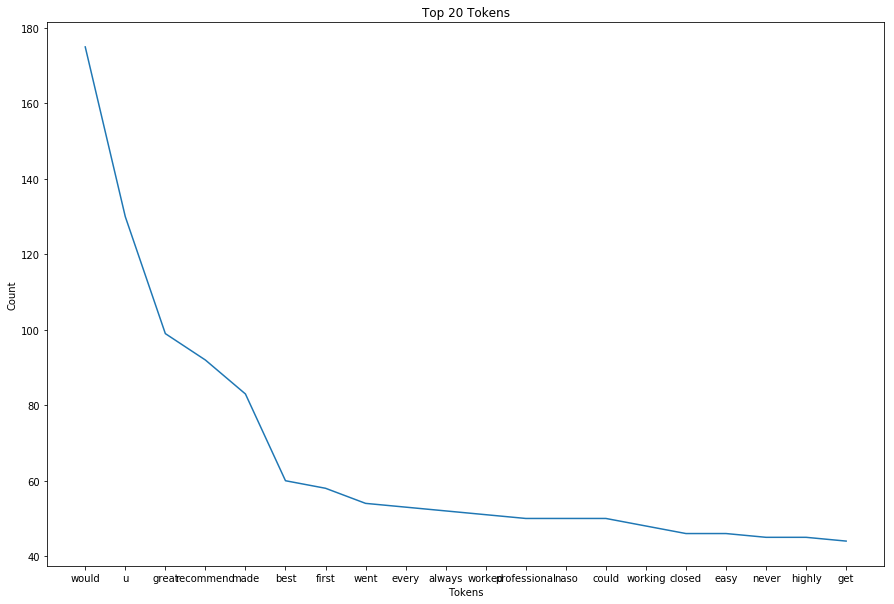

In [30]:
# Counting Words Appearing in a text(a frequency distribution)
top20 = dtm1[:20]
plt.figure(figsize=(15,10))
plt.plot('token','count',data=top20)
plt.xlabel('Tokens')
plt.ylabel('Count')
plt.title('Top 20 Tokens')
plt.show()

<b>Bank review data- Word Clouds

In [31]:
frequency_words_wo_stop= {}
for dat in data['Reviews']:
    tokens = nltk.wordpunct_tokenize(dat.lower())
    for token in tokens:
        if token.lower() not in stop:
            if token in frequency_words_wo_stop:
                count = frequency_words_wo_stop[token]
                count = count + 1
                frequency_words_wo_stop[token] = count
            else:
                frequency_words_wo_stop[token] = 1

In [32]:
frequency_words_wo_stop

{'great': 139,
 'job': 25,
 ',': 1135,
 'wyndham': 16,
 'capital': 12,
 '!': 222,
 'person': 17,
 'professional': 70,
 'helped': 35,
 'us': 207,
 'move': 12,
 'refinance': 70,
 'process': 253,
 'smoothly': 15,
 '.': 1976,
 'thank': 50,
 'matthew': 3,
 'richardson': 1,
 'helpful': 56,
 'find': 19,
 'correct': 1,
 'product': 10,
 'mortgage': 147,
 'much': 38,
 'excellent': 30,
 'service': 99,
 'past': 13,
 'experience': 110,
 'would': 246,
 'without': 29,
 'question': 7,
 'use': 48,
 'needed': 29,
 '!!': 24,
 'went': 70,
 'beyond': 25,
 'extra': 19,
 'mile': 8,
 'right': 28,
 'wrong': 7,
 'encountered': 7,
 'servicer': 3,
 'dealing': 14,
 'previous': 13,
 'loan': 313,
 'pulled': 4,
 'together': 8,
 'found': 16,
 'viable': 3,
 'option': 8,
 'ultimately': 5,
 'saved': 7,
 'money': 22,
 'highly': 65,
 'recommend': 156,
 'brad': 7,
 'thomka': 3,
 'team': 113,
 'needs': 27,
 'sincerest': 2,
 'thanks': 61,
 'ed': 2,
 '&': 30,
 'lind': 1,
 'beginning': 32,
 'started': 17,
 'stressful': 24,
 'ti

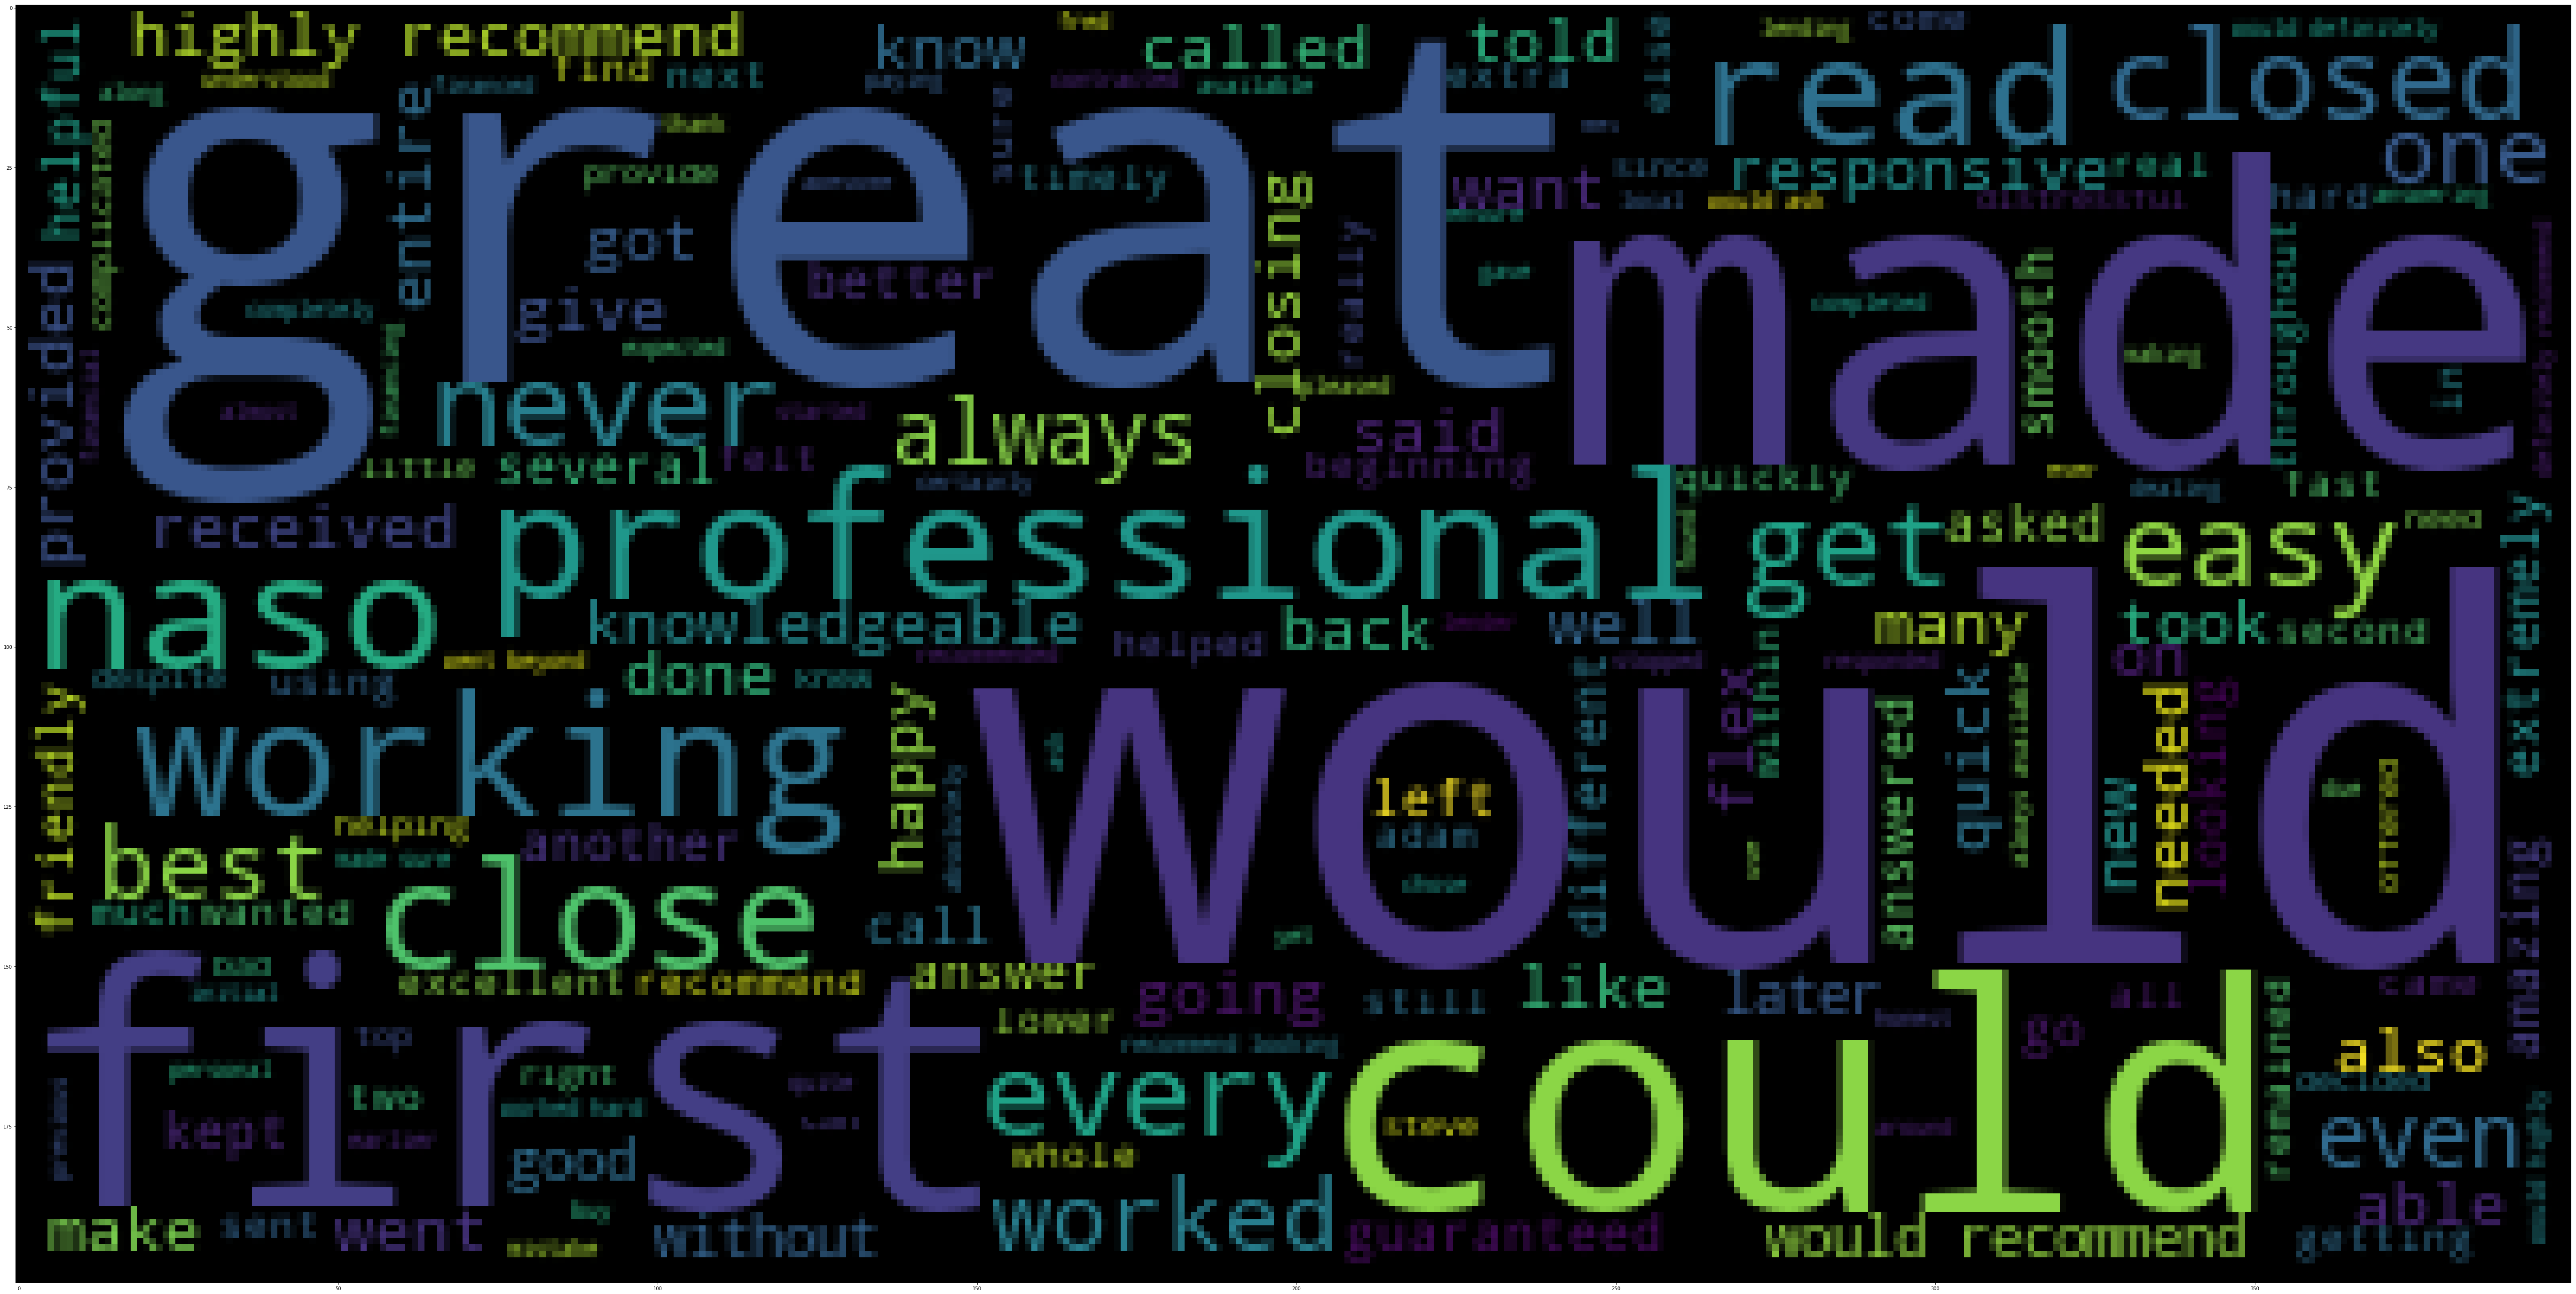

In [33]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(stopwords=[]).generate(' '.join(X_train.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [34]:
#Classify reviews to positive,negative and neutral
# we use textblob utility to calculate
def get_sentiment(text):
    analysis = TextBlob(text)    # create TextBlob objectof passed text
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
text = X_train
sentiment = text.apply(lambda x: get_sentiment(x))
table = pd.concat([text,sentiment],axis = 1)
column_name = table.columns.values
column_name[1]= 'sentiment'
table.columns = column_name
table.head()

,Reviews,sentiment
52,reliance helping u thought would difficult imp...,positive
229,started ran without agreed told could close le...,positive
246,professional yet personal highly recommend,positive
164,begin signing satisfied originating applied le...,positive
328,grateful came across knowledgable professional...,positive


In [35]:
#Checking Reviews Percentage
positive = table[table.sentiment == 'positive']
print('Positive Reviews Percentage: {} %'.format(100*len(positive)/len(table.Reviews)))
negative = table[table.sentiment == 'negative']
print('negative Reviews Percentage: {} %'.format(100*len(negative)/len(table.Reviews)))
neutral = table[table.sentiment == 'neutral']
print('neutral Reviews Percentage: {} %'.format(100*len(table.Reviews)-len(negative)-len(positive)/len(table.Reviews)))

Positive Reviews Percentage: 88.10198300283287 %
negative Reviews Percentage: 8.215297450424929 %
neutral Reviews Percentage: 35270.11898016997 %


In [36]:
#Checking Top Positive and Negitive Reviews
print("TOP 5 Positive Reviews \n\n",positive.head()['Reviews'].tolist(),'\n')
print("TOP 5 Negative Reviews \n\n",negative.head()['Reviews'].tolist(),'\n')

TOP 5 Positive Reviews 

 ['reliance helping u thought would difficult impossible were past lately were working hard improving happy able u guide u throughout despite le cellar financial especially patrick g excellent read', 'started ran without agreed told could close le took still asking closing household good unpacked told could used fly id take doc rotary back also get send accept personal five later driving no already sent could send four purchased past', 'professional yet personal highly recommend', 'begin signing satisfied originating applied lending tree competitive several matched slightly beat naso convincing chose naso goodge competitive assuring professional timely suppurative truthful goodge bent whole delivered promised completely satisfied appreciative bud read', 'grateful came across knowledgable professional always remained calm helped u every well made appreciated secured used well closed earlier expected happy'] 

TOP 5 Negative Reviews 

 ['lender quite gave needed 

<b>Importing important libraries

In [37]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

<b>Td-Idf Vectorization & Normalisation of train

In [91]:
tf_idf_vectorizor = TfidfVectorizer()
tf_idf = tf_idf_vectorizor.fit_transform(X_train)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [92]:
# Use SVD to reduce dimensions

#from sklearn.decomposition import TruncatedSVD
#svd = TruncatedSVD(250)
#normalizer = Normalizer(copy=False)
#lst = make_pipeline(svd, normalizer)
#X_lst = lst.fit_transform(tf_idf)

In [93]:
#code to select those components which attribute for 95% of variance in data
#count = 0
#for index, cumsum in enumerate(np.cumsum(svd.explained_variance_ratio_)):
   # if cumsum <=0.95:
   #   count+=1  
   # else:
   #     break
#print(count)

In [94]:
#for index, cumsum in enumerate(np.cumsum(svd.explained_variance_ratio_)):
   # print(index, cumsum)

<b>Using PCA for variable reduction

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_lst= sc.fit_transform(tf_idf_array)

In [96]:
from sklearn.decomposition import PCA
pca_x = PCA(0.95).fit(X_lst)
print('%d components explain 95%% of the variation in data' % pca_x.n_components_)

207 components explain 95% of the variation in data


In [97]:
sklearn_pca = PCA(n_components = 207)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)

<b>Finding Optimal number of Clusters- Elbow Analysis

In [98]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( Y_sklearn)
    cluster_errors.append( clusters.inertia_ )

In [99]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,315.026797
1,2,308.847912
2,3,305.923158
3,4,303.196179
4,5,301.374744
5,6,296.232267
6,7,295.472510
7,8,294.384437
8,9,288.954672
9,10,288.927039


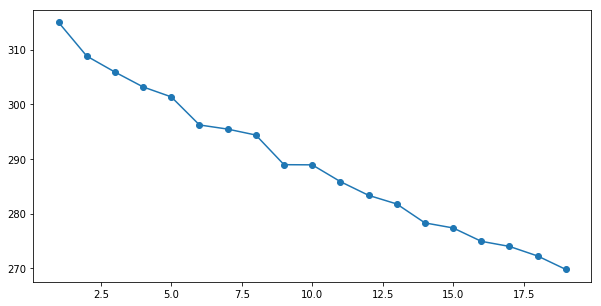

In [100]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

<b>Taking clusters-3 with the above graph

We will now implement our k-means clustering algorithm in our vectorized document below:

In [101]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(tf_idf_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now execute the below code to get the centroids and features

In [102]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()

Now we can print the centroids into which clusters they belongs

In [105]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind])

Cluster 0:
 responsive
 better
 professional
 helpful
 good
 extremely
 on
 knowledgeable
 smooth
 entire
 helped
 timely
 tormented
 worked
 made
Cluster 1:
 great
 always
 worked
 easy
 best
 flex
 professional
 went
 never
 closed
 hard
 close
 got
 would
 well
Cluster 2:
 would
 recommend
 made
 first
 amazing
 naso
 looking
 highly
 said
 every
 closed
 definitely
 working
 beginning
 on
